# TUGAS PRAKTIKUM 3 BDA
- Model Improvement
- Model : KNN, Naive Bayes, Logistic Regression dan SVM
- Nama : Cakra Arganata
- NIM : 1223903

# INISIALISASI, PREPROCESSING, EVALUASI DAN INFERENSI




JUMLAH NILAI 'NaN' PADA TIAP KOLOM:
Passenger Class                          0
Name                                     0
Sex                                      0
Age                                    263
No of Siblings or Spouses on Board       0
No of Parents or Children on Board       0
Ticket Number                            0
Passenger Fare                           1
Cabin                                 1014
Port of Embarkation                      2
Life Boat                              823
Survived                                 0
dtype: int64


DATA SETELAH DIBERSIHKAN:


,Sex,Age,Passenger Fare,Survived,Port of Embarkation_Cherbourg,Port of Embarkation_Queenstown,Port of Embarkation_Southampton,Passenger Class_First,Passenger Class_Second,Passenger Class_Third
0,0,29.0000,211.3375,1,False,False,True,True,False,False
1,1,0.9167,151.5500,1,False,False,True,True,False,False
2,0,2.0000,151.5500,0,False,False,True,True,False,False
3,1,30.0000,151.5500,0,False,False,True,True,False,False
4,0,25.0000,151.5500,0,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1304,0,14.5000,14.4542,0,True,False,False,False,False,True
1305,0,28.0000,14.4542,0,True,False,False,False,False,True
1306,1,26.5000,7.2250,0,True,False,False,False,False,True
1307,1,27.0000,7.2250,0,True,False,False,False,False,True




VISUALISASI KORELASI DATA FITUR DENGAN KOLOM 'SURVIVED':


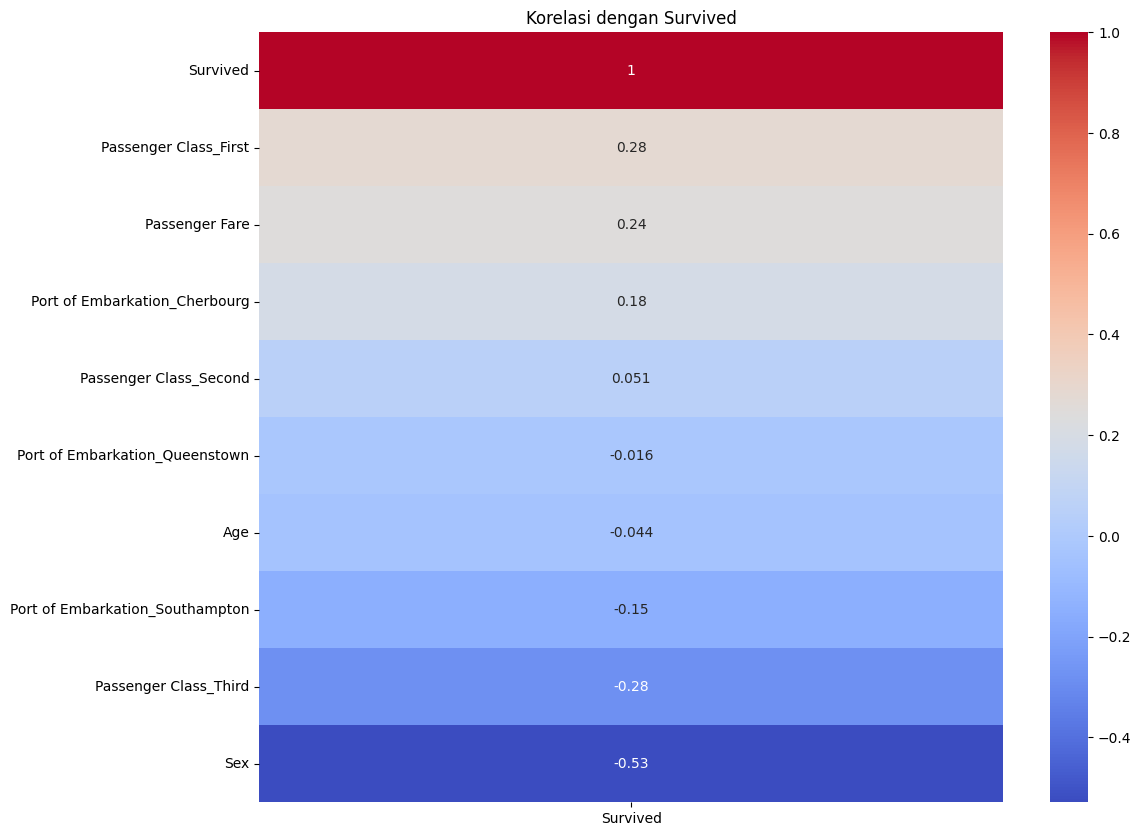



VALIDASI NILAI NaN:
Nilai NaN tidak ada, teruskan ke tahap selanjutnya


In [6]:
# INISIALISASI
# ================================================

# Import library yang digunakan
import pandas as pd # type: ignore
from sklearn.model_selection import train_test_split, GridSearchCV # type: ignore
from sklearn.linear_model import LinearRegression  # type: ignore # Regresi Linier
from sklearn.neighbors import KNeighborsClassifier  # type: ignore # KNN
from sklearn.naive_bayes import GaussianNB  # type: ignore # Naive Bayes
from sklearn.linear_model import LogisticRegression # type: ignore # Logistic Regression
from sklearn.svm import SVC # type: ignore # SVM
from sklearn.preprocessing import StandardScaler, MinMaxScaler # type: ignore
from sklearn.impute import SimpleImputer # type: ignore
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, mean_squared_error, r2_score # type: ignore
import joblib  # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
import warnings
import numpy as np # type: ignore

# Sembunyikan FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Membuka dataset
data = pd.read_csv('titanic.csv')

# Menampilkan jumlah nilai NaN pada tiap kolom
print("\n\nJUMLAH NILAI 'NaN' PADA TIAP KOLOM:")
print("=================================")
print(data.isna().sum())



# MANIPULASI DATA FITUR
# ================================================

# Membuat salinan dari data
data = data.copy()

# Mengisi nilai kosong (NaN) di kolom Age dengan median
data['Age'] = data['Age'].fillna(data['Age'].median())

# Mengisi nilai kosong (NaN) di kolom Port of Embarkation dengan modus (data yang paling sering muncul)
data['Port of Embarkation'] = data['Port of Embarkation'].fillna(
    data['Port of Embarkation'].mode()[0])

# Mengisi nilai kosong (NaN) di kolom Passenger Fare dengan median
data['Passenger Fare'] = data['Passenger Fare'].fillna(
    data['Passenger Fare'].median())

# Menghapus kolom [Name & Ticket Number : tidak relevan] dan [Cabin & Life Boat : banyak nilai NaN]
data = data.drop(['Cabin', 'Name', 'Ticket Number', 'Life Boat', 'No of Siblings or Spouses on Board', 'No of Parents or Children on Board'], axis=1)

# Mengubah kolom 'Sex' ke biner 1 dan 0
data['Sex'] = data['Sex'].map({'Male': 1, 'Female': 0})

# Mengonversi kolom kategorikal Port of Embarkation dan Passenger Class menjadi dummy variables
data = pd.get_dummies(data, columns=['Port of Embarkation', 'Passenger Class'])

# Mengubah kolom 'Survived' ke biner 1 dan 0
data['Survived'] = data['Survived'].map({'Yes': 1, 'No': 0})

# Menampilkan data
print("\n\nDATA SETELAH DIBERSIHKAN:")
print("=============================")
display(data)



# KORELASI DATA & VISUALISASI
# ================================================

# Menampilkan korelasi data hanya terhadap nilai 'Survived'
plt.figure(figsize=(12, 10))
correlation_with_survived = data.corr()['Survived'].sort_values(ascending=False)

# Menampilkan judul korelasi data fitur dengan kolom 'Survived'
print("\n\nVISUALISASI KORELASI DATA FITUR DENGAN KOLOM 'SURVIVED':")
print("============================================================")
# print(correlation_with_survived)

# Membuat visualisasiheatmap dari korelasi data fitur dengan kolom 'Survived'
sns.heatmap(correlation_with_survived.to_frame(), annot=True, cmap='coolwarm')
plt.title('Korelasi dengan Survived')
plt.show()


# NORMALISASI DATA
# ================================================

# Memisahkan fitur (x) dari target (y)
x = data.drop('Survived', axis=1)
y = data['Survived']

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Mengubah semua kolom menjadi numerik, mengganti nilai non-numerik dengan NaN
x = x.apply(pd.to_numeric, errors='coerce')

# Menampilkan judul korelasi data fitur dengan kolom 'Survived'
print("\n\nVALIDASI NILAI NaN:")
print("=======================")

# Memeriksa kolom mana yang mengandung nilai NaN
nan_columns = x.columns[x.isna().any()].tolist()
if nan_columns:
    print(f"Kolom yang mengandung nilai NaN: {nan_columns}")
    # Mengisi nilai NaN dengan rata-rata dari kolom masing-masing, kecuali kolom 'Sex'
    imputer = SimpleImputer(strategy='mean')
    x.loc[:, x.columns != 'Sex'] = imputer.fit_transform(
        x.loc[:, x.columns != 'Sex'])

    # Memastikan tipe data yang kompatibel
    x = x.astype(float)
else:
    (print("Nilai NaN tidak ada, teruskan ke tahap selanjutnya"))

# NAIVE BAYES TRAIN, TEST, VISUALISASI & INFERENSI BARU


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Akurasi: 0.7964
Recall: 0.6200
F1-Score: 0.6992
Mean Squared Error: 0.2036
R2-Score: 0.1374

Parameter terbaik:
{'var_smoothing': np.float64(0.12328467394420659)}

Model telah disimpan ke dalam file 'trained_model/model_nb_trained.joblib'


DATA VISUALISASI | MODEL: GaussianNB(var_smoothing=np.float64(0.12328467394420659))


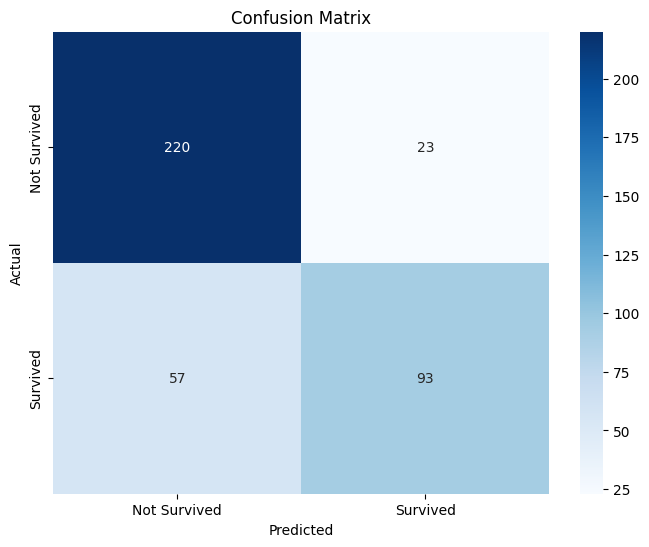



INFERENSI DATA BARU:
Model yang digunakan: GaussianNB(var_smoothing=np.float64(0.12328467394420659))

Data baru yang diolah:


,Sex,Age,Passenger Fare,Port of Embarkation_Cherbourg,Port of Embarkation_Queenstown,Port of Embarkation_Southampton,Passenger Class_First,Passenger Class_Second,Passenger Class_Third
0,0,48,150,0,0,1,0,1,0


Prediksi: SURVIVED | Probabilitas: 98.58%


In [7]:
# DATA TRAINING & TESTING | MODEL : Naive Bayes dengan Hyperparameter GridSearchCV
# ================================================

# Membagi data menjadi set pelatihan (70%) dan pengujian (30%).
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Mengatur model Naive Bayes
model_nb = GaussianNB()

# Mengatur parameter untuk GridSearchCV
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

try:
    # Menggunakan GridSearchCV untuk mencari hyperparameter terbaik
    grid_search = GridSearchCV(
        estimator=model_nb,
        param_grid=param_grid, 
        cv=5, # Menggunakan 5-fold cross-validation
        n_jobs=-1, # Menggunakan semua core CPU
        verbose=2, # Menampilkan detail dari proses GridSearchCV
        error_score='raise', # Menampilkan error jika terjadi NaN
        scoring='accuracy'
        )

    # Melatih model dengan GridSearchCV
    grid_search.fit(x_train, y_train)

    # Menggunakan hyperparameter terbaik untuk membuat model baru
    model_nb = GaussianNB(**grid_search.best_params_)
    model_nb.fit(x_train, y_train)
    
    # Membuat prediksi pada data pengujian menggunakan model terbaik
    y_pred = model_nb.predict(x_test)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Menampilkan hasil evaluasi
    print(f"Akurasi: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R2-Score: {r2:.4f}")

    # Menampilkan parameter terbaik
    print("\nParameter terbaik:")
    print(grid_search.best_params_)

    # Menyimpan model yang terlatih ke dalam file
    joblib.dump(model_nb, 'trained_model/model_nb_trained.joblib')
    print("\nModel telah disimpan ke dalam file 'trained_model/model_nb_trained.joblib'")

except ValueError as e:
    if 'Input X contains NaN' in str(e):
        print("Terjadi error: Data input mengandung nilai NaN. Silakan periksa data input dan pastikan semua nilai NaN telah diisi atau dihapus.")
    else:
        print(f"Terjadi error: {str(e)}")
    print("\nSilakan periksa data input dan konfigurasi model Anda")

# VISUALISASI DATA CONFUSION MATRIX
# ================================================

print(f"\n\nDATA VISUALISASI | MODEL: {model_nb}")
print("================================================================")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[
            'Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# INFERENSI DATA BARU
# ================================================

# Contoh data baru (pastikan format dan preprocessing sama dengan data pelatihan)
data_baru = pd.DataFrame({
    'Sex': [0],  # 1 untuk Male, 0 untuk Female
    'Age': [48],
    'Passenger Fare': [150],
    'Port of Embarkation_Cherbourg': [0],
    'Port of Embarkation_Queenstown': [0],
    'Port of Embarkation_Southampton': [1],
    'Passenger Class_First': [0],
    'Passenger Class_Second': [1],
    'Passenger Class_Third': [0]
})

# Normalisasi data baru menggunakan scaler yang sama
data_baru_scaled = scaler.transform(data_baru)

# Melakukan prediksi menggunakan model yang telah disimpan
model_nb = joblib.load('trained_model/model_nb_trained.joblib')
prediksi = model_nb.predict(data_baru_scaled)
probabilitas_prediksi = model_nb.predict_proba(data_baru_scaled)

# Menampilkan hasil prediksi dan tingkat keberhasilan
print("\n\nINFERENSI DATA BARU:")
print("=======================")
print("Model yang digunakan:", model_nb)
print("\nData baru yang diolah:")
display(data_baru)
print(f"Prediksi: {'SURVIVED' if prediksi[0] == 1 else 'NOT SURVIVED'} | Probabilitas: {
      probabilitas_prediksi[0][prediksi[0]] * 100:.2f}%")

# K-NN TRAIN, TEST, VISUALISASI & INFERENSI BARU



DATA TRAINING & TESTING | MODEL: K-NN
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Akurasi: 0.7913
Recall: 0.7267
F1-Score: 0.7267
Mean Squared Error: 0.2087
R2-Score: 0.1159

Parameter terbaik:
{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}


DATA VISUALISASI | MODEL: KNeighborsClassifier(n_neighbors=3)


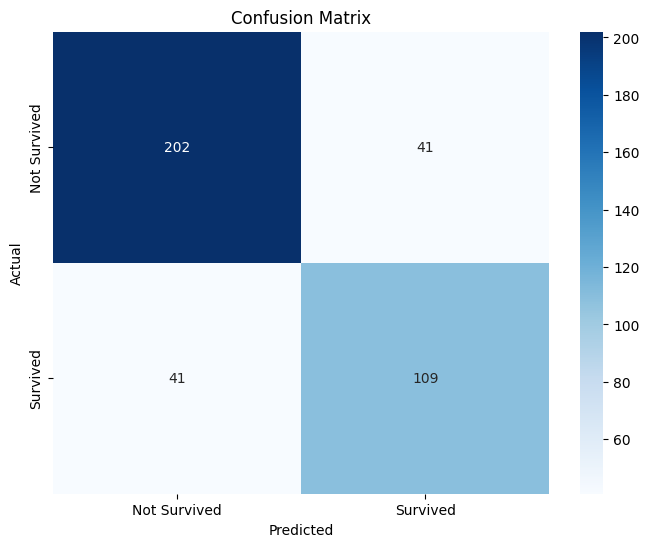



INFERENSI DATA BARU:
Model yang digunakan: KNeighborsClassifier(n_neighbors=3)

Data baru yang diolah:


,Sex,Age,Passenger Fare,Port of Embarkation_Cherbourg,Port of Embarkation_Queenstown,Port of Embarkation_Southampton,Passenger Class_First,Passenger Class_Second,Passenger Class_Third
0,0,48,150,0,0,1,0,1,0


Prediksi: SURVIVED | Probabilitas: 100.00%


In [8]:
# DATA TRAINING & TESTING | MODEL : K-NN dengan Hyperparameter GridSearchCV
# =================================================================

print("\n\nDATA TRAINING & TESTING | MODEL: K-NN")
print("======================================================")

# Membagi data menjadi set pelatihan (70%) dan pengujian (30%).
x_train, x_test, y_train, y_test = train_test_split(
    # Menggunakan stratify u/ memastikan bahwa proporsi kelas di set pelatihan dan set pengujian sama dengan proporsi kelas di seluruh data.
    x_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Mengatur model KNN
model_knn = KNeighborsClassifier()

# Mengatur grid search untuk hyperparameter tuning dengan GridSearchCV.
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    # Mengatur parameter grid search untuk KNN.
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
try:
    # Mencari parameter terbaik menggunakan cross-validation dengan error_score='raise'
    grid_search = GridSearchCV(
        estimator=model_knn,
        param_grid=param_grid,
        cv=5,  # Menggunakan 5-fold cross-validation
        n_jobs=-1,  # Menggunakan semua core CPU
        verbose=2,  # Menampilkan detail dari proses GridSearchCV
        error_score='raise',  # Menampilkan error jika terjadi NaN
        scoring='accuracy'  # Menggunakan akurasi sebagai metrik evaluasi
    )

    # Melatih model dengan GridSearchCV
    grid_search.fit(x_train, y_train)
    
    # Menggunakan hyperparameter terbaik untuk membuat model baru
    model_knn = grid_search.best_estimator_
    model_knn.fit(x_train, y_train)

    # Simpan model yang telah dilatih
    joblib.dump(model_knn, 'trained_model/model_knn_trained.joblib')

    # Membuat prediksi pada data pengujian
    y_pred = model_knn.predict(x_test)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Menampilkan hasil evaluasi
    print(f"Akurasi: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R2-Score: {r2:.4f}")

    # Menampilkan parameter terbaik
    print("\nParameter terbaik:")
    print(grid_search.best_params_)

except ValueError as e:
    if 'Input X contains NaN' in str(e):
        print("Terjadi error: Data input mengandung nilai NaN. Silakan periksa data input dan pastikan semua nilai NaN telah diisi atau dihapus.")
    else:
        print(f"Terjadi error: {str(e)}")
    print("\nSilakan periksa data input dan konfigurasi model Anda")



# VISUALISASI DATA CONFUSION MATRIX
# ================================================

print(f"\n\nDATA VISUALISASI | MODEL: {model_knn}")
print("================================================================")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[
            'Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# INFERENSI DATA BARU
# ================================================

# Contoh data baru (pastikan format dan preprocessing sama dengan data pelatihan)
data_baru = pd.DataFrame({
    'Sex': [0],  # 1 untuk Male, 0 untuk Female
    'Age': [48],
    'Passenger Fare': [150],
    'Port of Embarkation_Cherbourg': [0],
    'Port of Embarkation_Queenstown': [0],
    'Port of Embarkation_Southampton': [1],
    'Passenger Class_First': [0],
    'Passenger Class_Second': [1],
    'Passenger Class_Third': [0]
})

# Normalisasi data baru menggunakan scaler yang sama
data_baru_scaled = scaler.transform(data_baru)

# Melakukan prediksi menggunakan model yang telah disimpan
model_knn = joblib.load('trained_model/model_knn_trained.joblib')
prediksi = model_knn.predict(data_baru_scaled)
probabilitas_prediksi = model_knn.predict_proba(data_baru_scaled)

# Menampilkan hasil prediksi dan tingkat keberhasilan
print("\n\nINFERENSI DATA BARU:")
print("=======================")
print("Model yang digunakan:", model_knn)
print("\nData baru yang diolah:")
display(data_baru)
print(f"Prediksi: {'SURVIVED' if prediksi[0] == 1 else 'NOT SURVIVED'} | Probabilitas: {
      probabilitas_prediksi[0][prediksi[0]] * 100:.2f}%")

# LOGREG TRAIN, TEST, VISUALISASI & INFERENSI BARU



DATA TRAINING & TESTING | MODEL: LOGISTIC REGRESSION
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Akurasi: 0.8041
Recall: 0.7400
F1-Score: 0.7425
Mean Squared Error: 0.1959
R2-Score: 0.1698

Parameter terbaik:
{'C': 1, 'max_iter': 100, 'solver': 'newton-cg'}


DATA VISUALISASI | MODEL: LogisticRegression(C=1, random_state=42, solver='newton-cg')


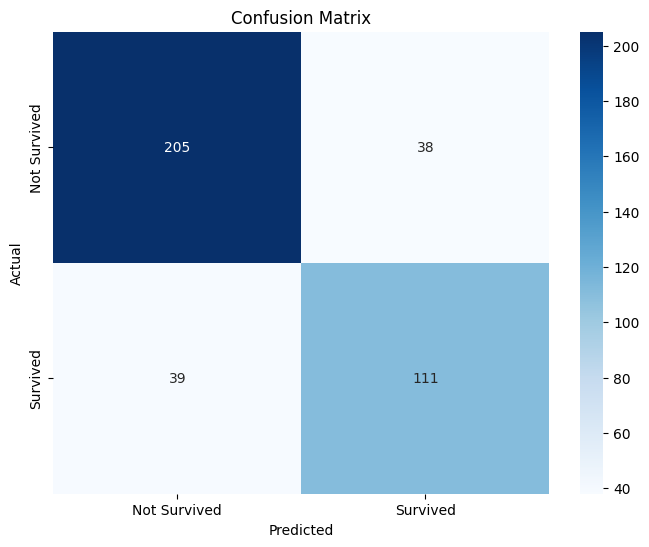



INFERENSI DATA BARU:
Model yang digunakan: LogisticRegression(C=1, random_state=42, solver='newton-cg')

Data baru yang diolah:


,Sex,Age,Passenger Fare,Port of Embarkation_Cherbourg,Port of Embarkation_Queenstown,Port of Embarkation_Southampton,Passenger Class_First,Passenger Class_Second,Passenger Class_Third
0,0,48,150,0,0,1,0,1,0


Prediksi: SURVIVED | Probabilitas: 59.55%


In [9]:
# DATA TRAINING & TESTING | MODEL : Logistic Regression dengan Hyperparameter GridSearchCV
# =================================================================================

print("\n\nDATA TRAINING & TESTING | MODEL: LOGISTIC REGRESSION")
print("======================================================")

# Membagi data menjadi set pelatihan (70%) dan pengujian (30%).
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Mengatur model Logistic Regression
model_lr = LogisticRegression(random_state=42)

# Menentukan ruang pencarian hyperparameter
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]
}

try:
    # Menggunakan GridSearchCV untuk menemukan kombinasi hyperparameter terbaik
    grid_search = GridSearchCV(
        estimator=model_lr, 
        param_grid=param_grid, 
        cv=5, # Menggunakan 5-fold cross-validation
        n_jobs=-1, # Menggunakan semua core CPU
        verbose=2, # Menampilkan detail dari proses GridSearchCV
        error_score='raise', # Menampilkan error jika terjadi NaN
        scoring='accuracy'
    )

    # Melatih model dengan GridSearchCV
    grid_search.fit(x_train, y_train)

    # Menggunakan hyperparameter terbaik untuk membuat model baru
    model_lr = LogisticRegression(**grid_search.best_params_, random_state=42)
    model_lr.fit(x_train, y_train)

    # Membuat prediksi pada data pengujian menggunakan model terbaik
    y_pred = model_lr.predict(x_test)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Menampilkan hasil evaluasi
    print(f"Akurasi: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R2-Score: {r2:.4f}")

    # Menampilkan parameter terbaik
    print("\nParameter terbaik:")
    print(grid_search.best_params_)

except ValueError as e:
    if 'Input X contains NaN' in str(e):
        print("Terjadi error: Data input mengandung nilai NaN. Silakan periksa data input dan pastikan semua nilai NaN telah diisi atau dihapus.")
    else:
        print(f"Terjadi error: {str(e)}")
    print("\nSilakan periksa data input dan konfigurasi model Anda")

# Menyimpan model yang telah dilatih
joblib.dump(model_lr, 'trained_model/model_lr_trained.joblib')

# VISUALISASI DATA CONFUSION MATRIX
# ================================================
print(f"\n\nDATA VISUALISASI | MODEL: {model_lr}")
print("================================================================")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[
            'Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# INFERENSI DATA BARU
# ================================================

# Contoh data baru (pastikan format dan preprocessing sama dengan data pelatihan)
data_baru = pd.DataFrame({
    'Sex': [0],  # 1 untuk Male, 0 untuk Female
    'Age': [48],
    'Passenger Fare': [150],
    'Port of Embarkation_Cherbourg': [0],
    'Port of Embarkation_Queenstown': [0],
    'Port of Embarkation_Southampton': [1],
    'Passenger Class_First': [0],
    'Passenger Class_Second': [1],
    'Passenger Class_Third': [0]
})

# Normalisasi data baru menggunakan scaler yang sama
data_baru_scaled = scaler.transform(data_baru)

# Melakukan prediksi menggunakan model yang telah disimpan
model_lr = joblib.load('trained_model/model_lr_trained.joblib')
prediksi = model_lr.predict(data_baru_scaled)
probabilitas_prediksi = model_lr.predict_proba(data_baru_scaled)

# Menampilkan hasil prediksi dan tingkat keberhasilan
print("\n\nINFERENSI DATA BARU:")
print("=======================")
print("Model yang digunakan:", model_lr)
print("\nData baru yang diolah:")
display(data_baru)
print(f"Prediksi: {'SURVIVED' if prediksi[0] == 1 else 'NOT SURVIVED'} | Probabilitas: {
      probabilitas_prediksi[0][prediksi[0]] * 100:.2f}%")

# SVM TRAIN, TEST, VISUALISASI & INFERENSI BARU




DATA TRAINING & TESTING | MODEL: SUPPORT VECTOR MACHINE (SVM)
Akurasi: 0.8511
Recall: 0.6600
F1-Score: 0.7719
Mean Squared Error: 0.1489
R2-Score: 0.3693


DATA VISUALISASI | MODEL: SVC(probability=True, random_state=42)


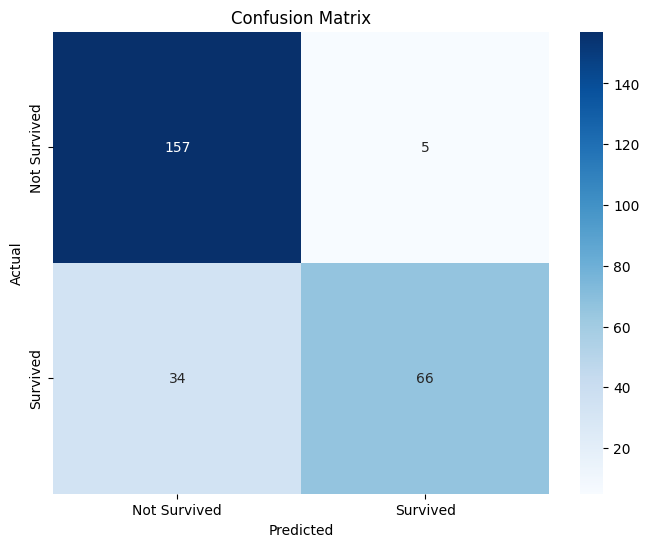



INFERENSI DATA BARU:
Model yang digunakan: SVC(probability=True, random_state=42)

Data baru yang diolah:


,Sex,Age,Passenger Fare,Port of Embarkation_Cherbourg,Port of Embarkation_Queenstown,Port of Embarkation_Southampton,Passenger Class_First,Passenger Class_Second,Passenger Class_Third
0,0,48,150,0,0,1,0,1,0


Prediksi: SURVIVED | Probabilitas: 76.24%


In [10]:
# DATA TRAINING & TESTING | MODEL : SUPPORT VECTOR MACHINE (SVM)
# =============================================================

print("\n\nDATA TRAINING & TESTING | MODEL: SUPPORT VECTOR MACHINE (SVM)")
print("================================================================")

# Membagi data menjadi set pelatihan (80%) dan pengujian (20%) - [persentase terbaik].
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Mengatur model SVM tanpa optimasi hyperparameter dengan probabilitas
model_svm = SVC(C=1.0, kernel='rbf', gamma='scale',
            random_state=42, probability=True)

# Melatih model
model_svm.fit(x_train, y_train)

# Menyimpan model yang telah dilatih
joblib.dump(model_svm, 'trained_model/model_svm_trained.joblib')

# Membuat prediksi pada data pengujian
y_pred = model_svm.predict(x_test)

# Menghitung probabilitas prediksi
y_pred_proba = model_svm.predict_proba(x_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Akurasi: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R2-Score: {r2:.4f}")

# VISUALISASI DATA CONFUSION MATRIX
# ================================================

print(f"\n\nDATA VISUALISASI | MODEL: {model_svm}")
print("================================================================")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[
            'Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# INFERENSI DATA BARU
# ================================================

# Contoh data baru (pastikan format dan preprocessing sama dengan data pelatihan)
data_baru = pd.DataFrame({
    'Sex': [0],  # 1 untuk Male, 0 untuk Female
    'Age': [48],
    'Passenger Fare': [150],
    'Port of Embarkation_Cherbourg': [0],
    'Port of Embarkation_Queenstown': [0],
    'Port of Embarkation_Southampton': [1],
    'Passenger Class_First': [0],
    'Passenger Class_Second': [1],
    'Passenger Class_Third': [0]
})

# Normalisasi data baru menggunakan scaler yang sama
data_baru_scaled = scaler.transform(data_baru)

# Melakukan prediksi menggunakan model yang telah disimpan
model_svm = joblib.load('trained_model/model_svm_trained.joblib')
prediksi = model_svm.predict(data_baru_scaled)
probabilitas_prediksi = model_svm.predict_proba(data_baru_scaled)

# Menampilkan hasil prediksi dan tingkat keberhasilan
print("\n\nINFERENSI DATA BARU:")
print("=======================")
print("Model yang digunakan:", model_svm)
print("\nData baru yang diolah:")
display(data_baru)
print(f"Prediksi: {'SURVIVED' if prediksi[0] == 1 else 'NOT SURVIVED'} | Probabilitas: {
      probabilitas_prediksi[0][prediksi[0]] * 100:.2f}%")